# Use uproot and `pandas`

In [1]:
# load root files to pandas dataframes using the uproot pacakge. 'pip install uproot' if needed.                                                                                    
import uproot, pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#for testing I like to limit the number of training events                                                                                                                          
limitNumberOfEvents = 10000

ttH = uproot.open("../Files/skimmed/ttH.root")["nominal"]
ttH_df = ttH.pandas.df().head(limitNumberOfEvents)

ttW = uproot.open("../Files/skimmed/ttW.root")["nominal"]
ttW_df = ttW.pandas.df().head(limitNumberOfEvents)


In [13]:
ttW_comp_check = uproot.open("../Files/skimmed/ttW.root")["nominal"]
ttW_comp_check_df = ttW_comp_check.pandas.df().head(limitNumberOfEvents)
del ttW_comp_check_df['weightS']


In [14]:
print( "Check headers are the same?")
A=ttH.keys()
B=ttW.keys()
np.array_equal(A,B) 


Check headers are the same?


True

In [16]:
C=ttW_comp_check_df.keys()
np.array_equal(C,B)

False

In [19]:
ttH_df.head()
#ttH_df['DEtall01'].head()

,DEtall01,lep_flavour,max_eta,minDeltaR_LJ_0,minDeltaR_LJ_1,Meff,DRlj00,min_DRl0b,min_DRlj_new,DPhij0MET,...,DRll01,nJets_OR_T,nJets_OR_T_MV2c10_70,HT_lep,HT_jets,lead_jetPt,sublead_jetPt,lepSFTrigTight,lepSFObjTight,weightS
entry,,,,,,,,,,,,,,,,,,,,,
0,1.155438,0,1.329590,0.889894,0.928825,1.219812e+06,3.609838,1.568172,1.204130,1.778188,...,2.833694,6,2,99685.375000,495748.250000,128011.968750,98597.164062,0.995519,0.943437,0.001535
1,-0.880768,1,0.463217,0.414457,0.788038,5.954846e+05,0.414457,2.340907,0.619072,2.925315,...,2.171907,5,1,73758.687500,225793.921875,68017.406250,42586.082031,0.636021,1.003987,0.001450
2,0.212666,1,0.168891,1.067585,1.043223,7.060143e+05,3.105180,1.730127,0.658229,1.766358,...,2.189412,4,1,110116.250000,236623.578125,126511.656250,47005.578125,0.960368,0.941945,0.001524
3,0.332677,2,1.323761,0.642110,0.488249,8.401949e+05,2.741835,2.741835,1.360282,2.360640,...,2.389086,5,1,56536.421875,353416.281250,138765.578125,85941.804688,0.989835,0.946505,0.001931
4,0.219985,3,1.913489,1.176604,1.057895,1.365021e+06,1.656937,1.927142,1.771835,1.254011,...,0.472404,7,1,83682.382812,543441.937500,176302.593750,157836.390625,0.993249,0.965123,0.001253


(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        6.200e+01, 5.920e+02, 9.060e+02, 1.049e+03, 1.174e+03, 1.344e+03,
        1.385e+03, 1.443e+03, 1.458e+03, 4.370e+02, 1.130e+02, 2.700e+01,
        6.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00]),
 array([-2.        , -1.65217391, -1.30434783, -0.95652174, -0.60869565,
        -0.26086957,  0.08695652,  0.43478261,  0.7826087 ,  1.13043478,
         1.47826087,  1.82608696,  2.17391304,  2.52173913,  2.86956522,
         3.2173913 ,  3.56521739,  3.91304348,  4.26086957,  4.60869565,
         4.95652174,  5.30434783,  5.65217391,  6.        ]),
 <a list of 1 Patch objects>)

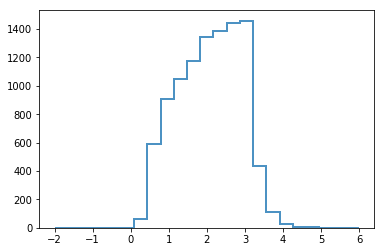

In [21]:
var='DRll01'
binning = {"DRll01": np.linspace(-2, 6, 24),
               "max_eta": np.linspace(0, 2.5, 26)}
plt.hist(ttH_df[var], binning[var], histtype='step',
         label=["ttH"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.hist(ttW_df[var], binning[var], histtype='step',
         label=["ttW"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.xlabel('$p_T$ [GeV]',fontsize=12)
plt.ylabel('# jets',fontsize=12)
plt.yscale('log')
plt.legend()